# **Decision Boundary Smoothening using D2C Method**
This notebook contains the code (for binary classification using synthetic dataset in this case) using our proposed method, **Divide2Conquer (D2C)** & also the Traditional approach to address the issue of **Overfitting** in Deep Learning models. In this notebook, we investigate how the decision boundary changes when we use D2C method, compared to the traditional approach, using a simple ANN model. This is because as we know, Decision Boundaries can give crucial insights about the generalization of a model.

## **Importing Necessary Packages & Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Generating synthetic data with blobs and added noise
X, y = make_blobs(n_samples=240, centers=2, random_state=1, cluster_std=2.5)
noise = np.random.normal(0, 1, X.shape)
X = X + noise * 7.5

# **Visualizing the Decision Boundary Using Traditional Approach**

Training Accuracy: 0.9944
Test Accuracy: 0.6833


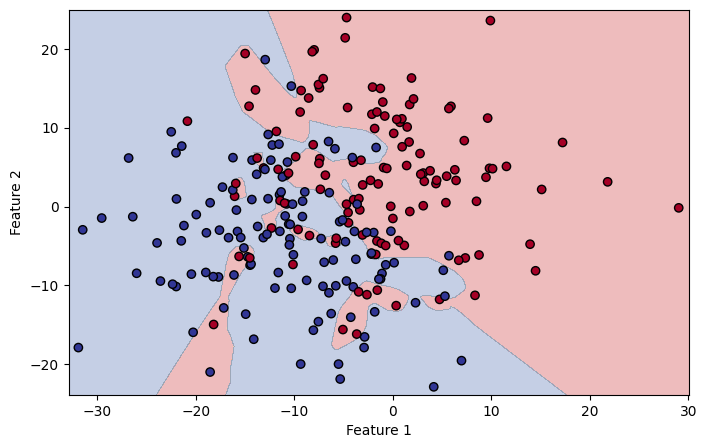

In [ ]:
# Splitting the dataset into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating a pipeline with scaling and ANN
ann_clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42))

# Fitting the model to the training data
ann_clf.fit(X_train, y_train)

# Predicting on the training and testing data
y_train_pred = ann_clf.predict(X_train)
y_test_pred = ann_clf.predict(X_test)

# Calculating the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the training and testing accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Creating a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = ann_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Adjusting figure size
plt.figure(figsize=(8, 5))

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.title("Decision Boundary with Traditional Approach")

# Saving the figure as SVG, PDF and PNG
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary SVG/N1_decision_boundary.svg", format='svg', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PNG/N1_decision_boundary.png", format='png', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PDF/N1_decision_boundary.pdf", format='pdf', bbox_inches='tight', dpi=600)

plt.show()

# **Dividing the Training Set into 3 Subsets and Training Each Separately to Visualize the Decision Boundaries**

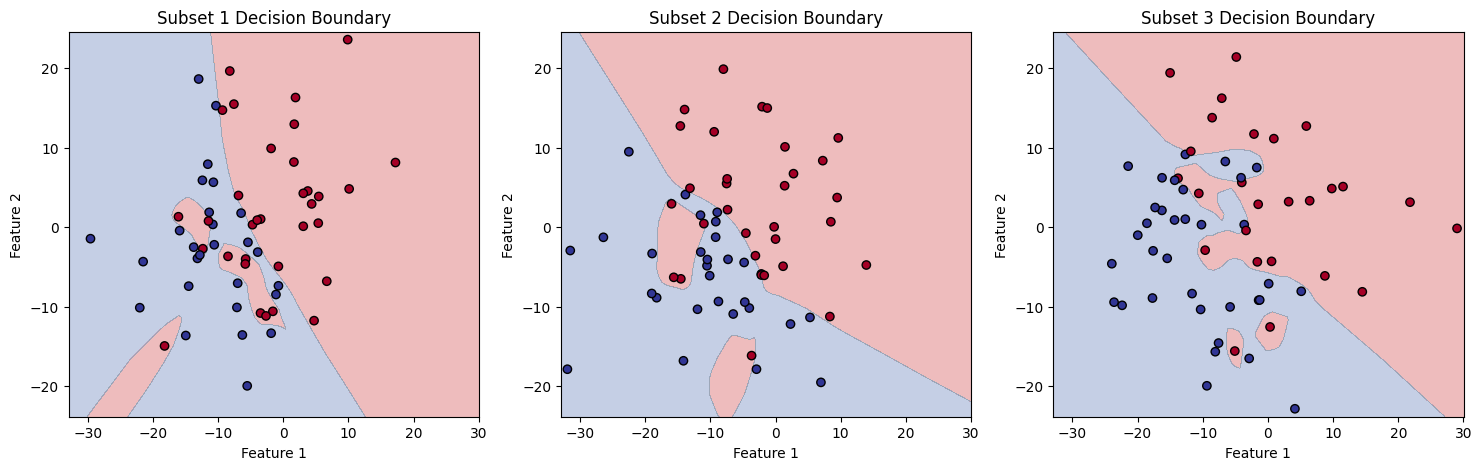

In [ ]:
# Splitting the dataset into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)

# Splitting the dataset into 3 equal parts
n_samples = len(X_train)
part_size = n_samples // 3
X_parts = [X_train[i*part_size:(i+1)*part_size] for i in range(3)]
y_parts = [y_train[i*part_size:(i+1)*part_size] for i in range(3)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training and plotting for each part
for i in range(3):
    ann_clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42))
    ann_clf.fit(X_parts[i], y_parts[i])
    plot_decision_boundary(ann_clf, X_parts[i], y_parts[i], axes[i], f"Subset {i+1} Decision Boundary")

#plt.subplots_adjust(hspace=0.25)

# Saving the figure as SVG, PDF and PNG
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary SVG/Subsets_decision_boundary_Hor.svg", format='svg', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PNG/Subsets_decision_boundary_Hor.png", format='png', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PDF/Subsets_decision_boundary_Hor.pdf", format='pdf', bbox_inches='tight', dpi=600)

plt.show()

# **Visualizing the Decision Boundary Using D2C Method With 2 Subsets**

Training Accuracy: 0.7611
Test Accuracy: 0.7500


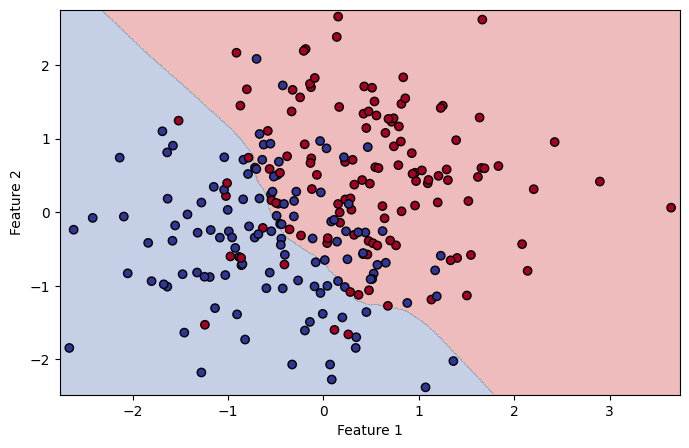

In [ ]:
# Splitting the dataset into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Splitting the training set into 2 equal parts
n_samples = len(X_train)
part_size = n_samples // 2
X_parts = [X_train[i*part_size:(i+1)*part_size] for i in range(2)]
y_parts = [y_train[i*part_size:(i+1)*part_size] for i in range(2)]

# Training the models and storing their weights
weights = []
biases = []

for i in range(2):
    ann_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_parts[i])
    ann_clf.fit(X_scaled, y_parts[i])
    weights.append(ann_clf.coefs_)
    biases.append(ann_clf.intercepts_)

# Averaging the weights and biases
avg_weights = [np.mean([weights[j][i] for j in range(2)], axis=0) for i in range(len(weights[0]))]
avg_biases = [np.mean([biases[j][i] for j in range(2)], axis=0) for i in range(len(biases[0]))]

# Creating a new ANN with the averaged weights and biases
avg_ann_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
avg_ann_clf.fit(X_train_scaled, y_train)  # Dummy fit to initialize the weights

# Assigning the averaged weights and biases to the new model
avg_ann_clf.coefs_ = avg_weights
avg_ann_clf.intercepts_ = avg_biases

# Evaluating the model
X_test_scaled = scaler.transform(X_test)
y_train_pred = avg_ann_clf.predict(X_train_scaled)
y_test_pred = avg_ann_clf.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting the decision boundary for the original dataset using the new ANN with averaged weights
fig, ax = plt.subplots(figsize=(8, 5))
plot_decision_boundary(avg_ann_clf, scaler.transform(X), y, ax, "Decision Boundary with Averaged Weights from the Subsets (N=2)")

# Saving the figure as SVG, PDF and PNG
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary SVG/N2_decision_boundary.svg", format='svg', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PNG/N2_decision_boundary.png", format='png', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PDF/N2_decision_boundary.pdf", format='pdf', bbox_inches='tight', dpi=600)

plt.show()


# **Visualizing the Decision Boundary Using D2C Method With 3 Subsets**

Training Accuracy: 0.7944
Test Accuracy: 0.8333


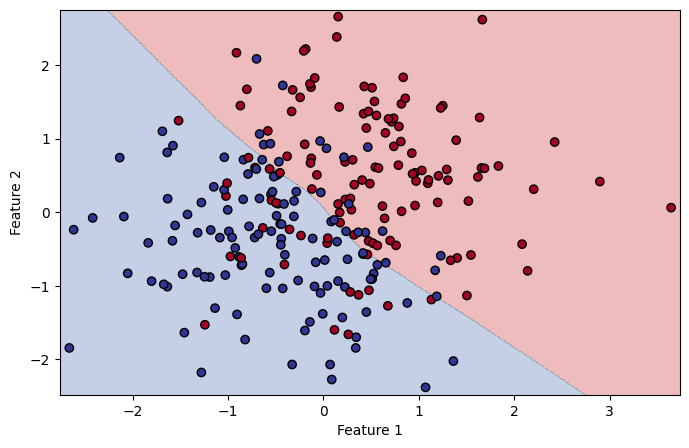

In [ ]:
# Splitting the dataset into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Splitting the training set into 3 equal parts
n_samples = len(X_train)
part_size = n_samples // 3
X_parts = [X_train[i*part_size:(i+1)*part_size] for i in range(3)]
y_parts = [y_train[i*part_size:(i+1)*part_size] for i in range(3)]

# Training the models and storing their weights
weights = []
biases = []

for i in range(3):
    ann_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_parts[i])
    ann_clf.fit(X_scaled, y_parts[i])
    weights.append(ann_clf.coefs_)
    biases.append(ann_clf.intercepts_)

# Averaging the weights and biases
avg_weights = [np.mean([weights[j][i] for j in range(3)], axis=0) for i in range(len(weights[0]))]
avg_biases = [np.mean([biases[j][i] for j in range(3)], axis=0) for i in range(len(biases[0]))]

# Creating a new ANN with the averaged weights and biases
avg_ann_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
avg_ann_clf.fit(X_train_scaled, y_train)  # Dummy fit to initialize the weights

# Assigning the averaged weights and biases to the new model
avg_ann_clf.coefs_ = avg_weights
avg_ann_clf.intercepts_ = avg_biases

# Evaluating the model
X_test_scaled = scaler.transform(X_test)
y_train_pred = avg_ann_clf.predict(X_train_scaled)
y_test_pred = avg_ann_clf.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting the decision boundary for the original dataset using the new ANN with averaged weights
fig, ax = plt.subplots(figsize=(8, 5))
plot_decision_boundary(avg_ann_clf, scaler.transform(X), y, ax, "Decision Boundary with Averaged Weights from the Subsets (N=3)")

# Saving the figure as SVG, PDF and PNG
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary SVG/N3_decision_boundary.svg", format='svg', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PNG/N3_decision_boundary.png", format='png', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PDF/N3_decision_boundary.pdf", format='pdf', bbox_inches='tight', dpi=600)

plt.show()


# **Visualizing the Decision Boundary Using D2C Method With 4 Subsets**

Training Accuracy: 0.7889
Test Accuracy: 0.8333


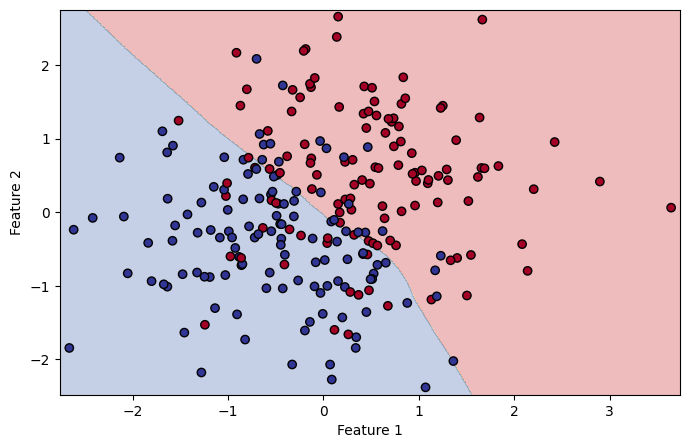

In [ ]:
# Splitting the dataset into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Splitting the training set into 4 equal parts
n_samples = len(X_train)
part_size = n_samples // 4
X_parts = [X_train[i*part_size:(i+1)*part_size] for i in range(4)]
y_parts = [y_train[i*part_size:(i+1)*part_size] for i in range(4)]

# Traininhg the models and storing their weights
weights = []
biases = []

for i in range(4):
    ann_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_parts[i])
    ann_clf.fit(X_scaled, y_parts[i])
    weights.append(ann_clf.coefs_)
    biases.append(ann_clf.intercepts_)

# Averaging the weights and biases
avg_weights = [np.mean([weights[j][i] for j in range(4)], axis=0) for i in range(len(weights[0]))]
avg_biases = [np.mean([biases[j][i] for j in range(4)], axis=0) for i in range(len(biases[0]))]

# Creating a new ANN with the averaged weights and biases
avg_ann_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
avg_ann_clf.fit(X_train_scaled, y_train)  # Dummy fit to initialize the weights

# Assigning the averaged weights and biases to the new model
avg_ann_clf.coefs_ = avg_weights
avg_ann_clf.intercepts_ = avg_biases

# Evaluating the model
X_test_scaled = scaler.transform(X_test)
y_train_pred = avg_ann_clf.predict(X_train_scaled)
y_test_pred = avg_ann_clf.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting the decision boundary for the original dataset using the new ANN with averaged weights
fig, ax = plt.subplots(figsize=(8, 5))
plot_decision_boundary(avg_ann_clf, scaler.transform(X), y, ax, "Decision Boundary with Averaged Weights from the Subsets (N=4)")

# Saving the figure as SVG, PDF and PNG
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary SVG/N4_decision_boundary.svg", format='svg', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PNG/N4_decision_boundary.png", format='png', bbox_inches='tight', dpi=600)
plt.savefig("/content/drive/MyDrive/IAR Research Grant/Codes/Figures/Decision Boundary PDF/N4_decision_boundary.pdf", format='pdf', bbox_inches='tight', dpi=600)

plt.show()
